# Import the Necessary Libraries and Setting the Random Seed Generator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import model_selection, datasets, metrics, preprocessing

In [2]:
tf.random.set_seed(42)

# A - Iris Data Deep Learning Model:

1- Data Importing and Preprocessing:

In [3]:
iris_features, iris_target = datasets.load_iris(return_X_y=True)

In [4]:
print("Number of Classes in the Iris's Target Variable:", set(iris_target))
print('='*50)
print('Number of Features: ', iris_features.shape[1])

Number of Classes in the Iris's Target Variable: {0, 1, 2}
Number of Features:  4


In [5]:
# - Splitting Features & Target Variables:
iris_features_train, iris_features_test, iris_target_train, iris_target_test = model_selection.train_test_split(iris_features, iris_target, test_size=.1)

# - Standardize the Features:
iris_scaler = preprocessing.StandardScaler()
iris_features_train_ss = iris_scaler.fit_transform(iris_features_train)
iris_features_test_ss = iris_scaler.transform(iris_features_test)

# - Transform the Target Variable with One-Hot Encoding
iris_target_train_1hot = tf.one_hot(iris_target_train, depth=len(set(iris_target_train)))
iris_target_test_1hot = tf.one_hot(iris_target_test, depth=len(set(iris_target_test)))

2- Model Construction and Training:

In [6]:
# Construct a Deep Neural Network Model:
iris_model = tf.keras.Sequential([
    tf.keras.Input(4),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

# Compiling the Built Model:
iris_model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=['acc'])

In [7]:
# Setting the Callback Conditions:
iris_callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=.01, patience=3)]

In [8]:
# Running the Model:
iris_history = iris_model.fit(iris_features_train_ss, iris_target_train_1hot, epochs=100,
                              validation_split=.1, batch_size=32, verbose=0, 
                              validation_data=(iris_features_test_ss, iris_target_test_1hot), 
                              callbacks=iris_callbacks)

3- Model Evaluation:

In [9]:
# Checking the Model's Accuracy
tf.reduce_mean(tf.metrics.categorical_accuracy(iris_target_test_1hot, iris_model.predict(iris_features_test_ss)))

<tf.Tensor: shape=(), dtype=float32, numpy=0.93333334>

In [10]:
# Creating Vector of the Predicted Targets:
iris_target_prediction_argmax = tf.argmax(iris_model.predict(iris_features_test_ss), axis=1)

# Constructing a Confusion Matrix:
iris_matrix = metrics.confusion_matrix(iris_target_test, iris_target_prediction_argmax)

# Define the Confusion Matrix Columns & Indixes:
iris_df = pd.DataFrame(iris_matrix, index=['setosa', 'versicolor', 'virginica'], 
                       columns=['setosa', 'versicolor', 'virginica'])

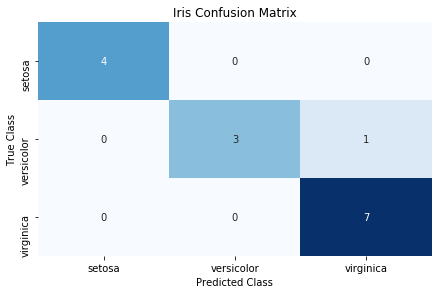

In [11]:
# Plot the Wine'e Confustion Matrix:
sns.heatmap(iris_df, annot=True, cbar=None, cmap='Blues')
plt.title('Iris Confusion Matrix')
plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

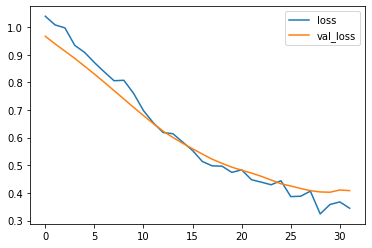

In [12]:
# Plotting Loss & Validation Loss:
iris_history_df = pd.DataFrame(iris_history.history)
iris_history_df[['loss', 'val_loss']].plot.line()

# =========================================

# B- Wine Data Deep Learning Model:

1- Data Importing and Preprocessing:

In [13]:
wine_features, wine_target = datasets.load_wine(return_X_y=True)

In [14]:
print("Number of Classes in the Wine's Target Variable:", set(wine_target))
print('='*50)
print('Number of Features: ', wine_features.shape[1])

Number of Classes in the Wine's Target Variable: {0, 1, 2}
Number of Features:  13


In [15]:
# - Splitting Features & Target Variables:
wine_features_train, wine_features_test, wine_target_train, wine_target_test = model_selection.train_test_split(wine_features, wine_target, test_size=.1)

# - Standardize the Features:
wine_scaler = preprocessing.StandardScaler()
wine_features_train_ss = wine_scaler.fit_transform(wine_features_train)
wine_features_test_ss = wine_scaler.transform(wine_features_test)

# - Transform the Target Variable with One-Hot Encoding
wine_target_train_1hot = tf.one_hot(wine_target_train, depth=len(set(wine_target_train)))
wine_target_test_1hot = tf.one_hot(wine_target_test, depth=len(set(wine_target_test)))

2- Model Construction and Training:

In [16]:
# Construct a Deep Neural Network Model:
wine_model = tf.keras.Sequential([
    tf.keras.Input(13),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

# Compiling the Built Model:
wine_model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=['acc'])

In [17]:
# Setting the Callback Conditions:
wine_callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=.01, patience=3)]

In [18]:
# Running the Model:
wine_history = wine_model.fit(wine_features_train_ss, wine_target_train_1hot, epochs=100,
                              validation_split=.1, batch_size=32, verbose=0, 
                              validation_data=(wine_features_test_ss, wine_target_test_1hot), 
                              callbacks=wine_callbacks)

3- Model Evaluation:

In [19]:
# Checking the Model's Accuracy
tf.reduce_mean(tf.metrics.categorical_accuracy(wine_target_test_1hot, wine_model.predict(wine_features_test_ss)))

<tf.Tensor: shape=(), dtype=float32, numpy=0.9444444>

In [20]:
# Creating Vector of the Predicted Targets:
wine_target_prediction_argmax = tf.argmax(wine_model.predict(wine_features_test_ss), axis=1)

# Constructing a Confusion Matrix:
wine_matrix = metrics.confusion_matrix(wine_target_test, wine_target_prediction_argmax)

# Define the Confusion Matrix Columns & Indixes:
wine_df = pd.DataFrame(wine_matrix, index=['Class 0', 'Class 1', 'Class 2'], 
                  columns=['Class 0', 'Class 1', 'Class 2'])

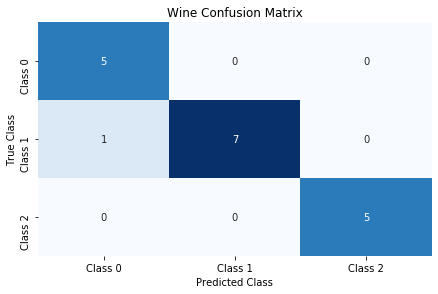

In [21]:
# Plot the Wine'e Confustion Matrix:
sns.heatmap(wine_df, annot=True, cbar=None, cmap='Blues')
plt.title('Wine Confusion Matrix')
plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

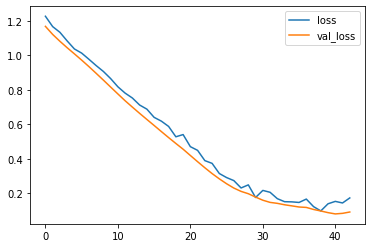

In [22]:
# Plotting Loss & Validation Loss:
wine_history_df = pd.DataFrame(wine_history.history)
wine_history_df[['loss', 'val_loss']].plot.line()